---
title: "Clustering"
---

# Intro

Introduction:
Provided brief summary (1 to 2 paragraphs) about your feature data 
, and what you are trying to achieve with your clustering analysis.

In my feature data, I am examining patterns in my feature set of international Apple Music streaming rankings. I am looking at the chart position of an artist, the length of time the artist has been at their position on the charts, the amount of times the artist maintained that position, the points accumulated, and the rank in their country. As these metrics all suggest a form of appreciation their piece of work has received worldwide, my aim is to find out how similar these variables may be in representing social appreciation. 

# Theory

### K- Means

K- means is a method that separates data into "k" number of clusters. This "k" is the number of means (centroids) that will be reference points for the data. The centroid the data point is closest to, is where the data point migrates to-- making it a part of that cluster. One great thing about the k- means method is the algorithm minizes the variance between data points belonging to the same cluster. This is through squaring Euclidean distance (the length between two points).

model selection method and function: Elbow Method

model selection method and function: Silhouette Method

### DBSCAN

DBSCAN is Density- Based Cluster Identification.

model selection method and function

model selection method and function

### Hierarchal Clustering

Hierarchal clustering consists of two type of methods: Agglomerative Clustering and Division Clustering.

# Methods 

My clustering strategy is to run the three algortihms, see which parameters fit my feature data the best, and present my datasets' clusters through the optimized algorithms.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

appledf = pd.read_csv("../websitedata/apple_py.csv")

newAppledf = pd.read_csv("../websitedata/newApple_py.csv")

After importing my necessary libraries and datasets, I will separate my updated feature set into the features that I will be experimenting on and the target set. For this analysis, due to the use of unsupervised learning algorithms, I will not be actually using my target vector (y).

In [2]:
x = newAppledf.to_numpy()

y = appledf["Peak"]
y=np.array(y)

### Pre- Processing Hyperparameter Tuning

I will implement hyperparameter tuning before processing my data, just so I can see which parameters will optimize my clusters.

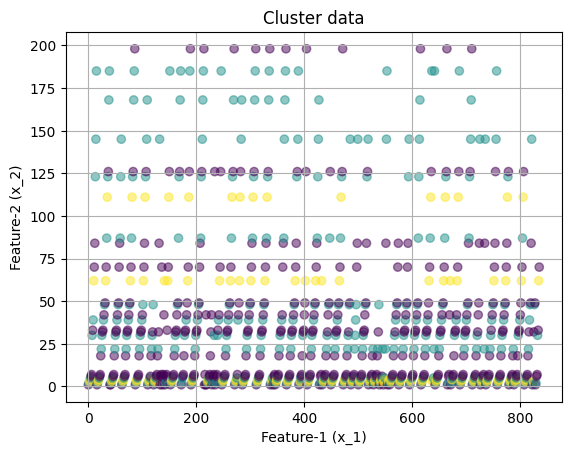

In [3]:
# UTILITY PLOTTING FUNCTION
def plot(X,color_vector):
    fig, ax = plt.subplots()
    ax.scatter(X[:,0], X[:,1],c=color_vector, alpha=0.5) #, c=y
    ax.set(xlabel='Feature-1 (x_1)', ylabel='Feature-2 (x_2)',
    title='Cluster data')
    ax.grid()
    # fig.savefig("test.png")
    plt.show()

plot(x,y)

In [20]:
import sklearn.cluster

# THIS WILL ITERATE OVER ONE HYPER-PARAMETER (GRID SEARCH)
# AND RETURN THE CLUSTER RESULT THAT OPTIMIZES THE SILHOUETTE SCORE
def maximize_silhouette(X,algo="birch",nmax=20,i_plot=False):

    # PARAM
    i_print=False
    opt_param = None
    opt_labels = None

    
    #FORCE CONTIGUOUS
    X=np.ascontiguousarray(x)

    # LOOP OVER HYPER-PARAM
    params=[]; sil_scores=[]
    sil_max=-10
    for param in range(2,nmax+1):
        if(algo=="birch"):
            model = sklearn.cluster.Birch(n_clusters=param).fit(X)
            labels=model.predict(X)

        if(algo=="ag"):
            model = sklearn.cluster.AgglomerativeClustering(n_clusters=param).fit(X)
            labels=model.labels_

        if(algo=="dbscan"):
            eps_val=0.25*(param-1)
            model = sklearn.cluster.DBSCAN(eps=eps_val).fit(X)
            labels=model.labels_

        if(algo=="kmeans"):
            model = sklearn.cluster.KMeans(n_clusters=param).fit(X)
            labels=model.predict(X)

        try:
            sil_scores.append(sklearn.metrics.silhouette_score(X,labels))
            params.append(param)
        except:
            continue

        if(i_print): print(param,sil_scores[-1])

        if(sil_scores[-1]>sil_max):
             opt_param=param
             sil_max=sil_scores[-1]
             opt_labels=labels

    print("OPTIMAL PARAMETER =",opt_param)

    if(i_plot):
        fig, ax = plt.subplots()
        ax.plot(params, sil_scores, "-o")
        ax.set(xlabel='Hyper-parameter', ylabel='Silhouette')
        plt.show()

    return opt_labels

#opt_param=param


### KMEAN

e.g. For k-means, Use Elbow and Silhouette methods to illustrate the ideal number of clusters. Visualize your results.
Also, when relevant, explore different choices of distance metric for the algorithm. Which distance metric seems to works best in which cases and why?

C:\Users\Amand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Amand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Amand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

OPTIMAL PARAMETER = 2


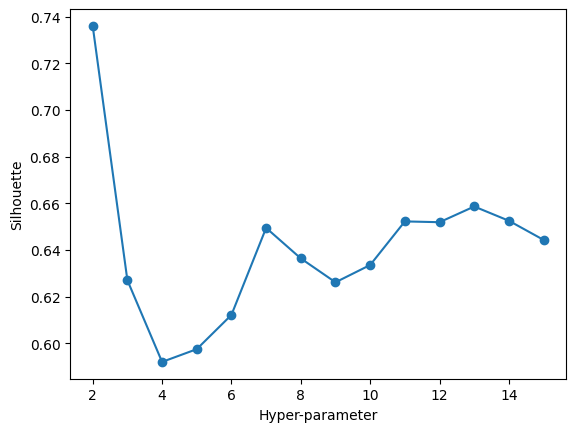

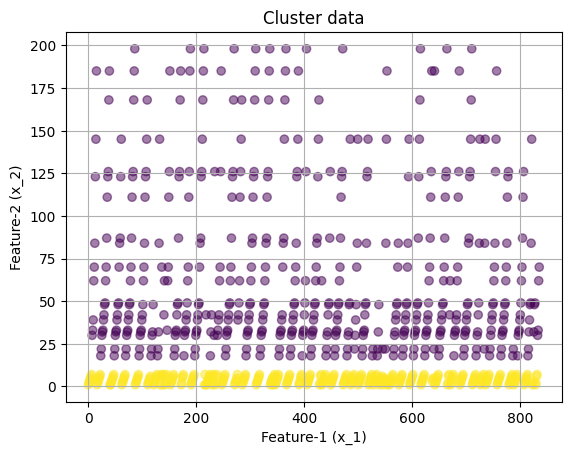

In [27]:
# KMEANS
opt_labels=maximize_silhouette(x,algo="kmeans",nmax=15, i_plot=True)
plot(x,opt_labels)

### DBSCAN

In [22]:
# UTILITY PLOTTING FUNCTION
def plot(x,color_vector):
    fig, ax = plt.subplots()
    ax.scatter(x[:,0], x[:,1],c=color_vector, alpha=0.5) #, c=y
    ax.set(xlabel='Feature-1 (x_1)', ylabel='Feature-2 (x_2)',
    title='Cluster data')
    ax.grid()
    # fig.savefig("test.png")
    plt.show()

# plot(X,y)

OPTIMAL PARAMETER = None


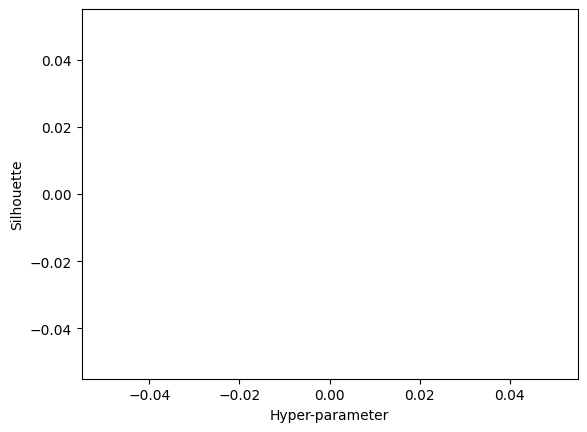

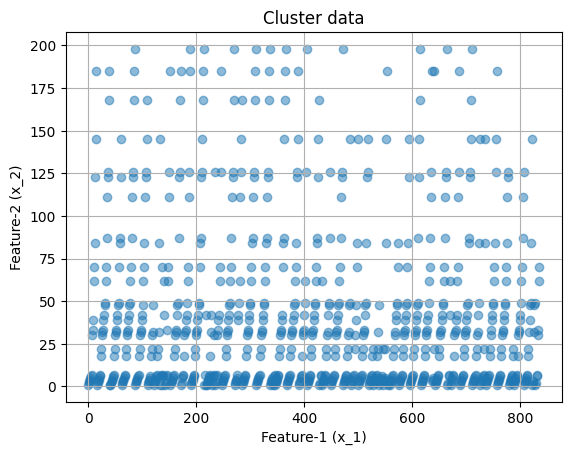

In [23]:
# DBSCAN
opt_labels=maximize_silhouette(x,algo="dbscan",nmax=15, i_plot=True)
plot(x,opt_labels)

### Heirarchal Clustering

OPTIMAL PARAMETER = 2


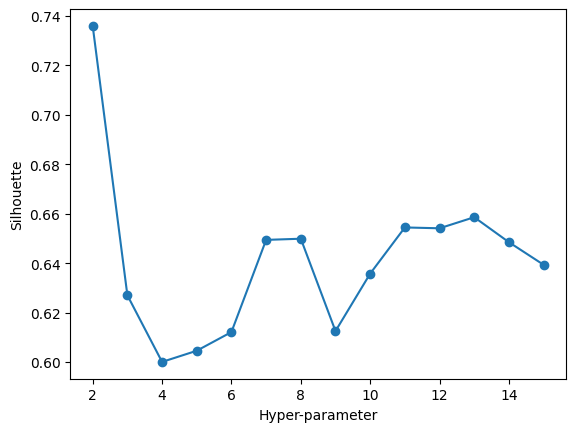

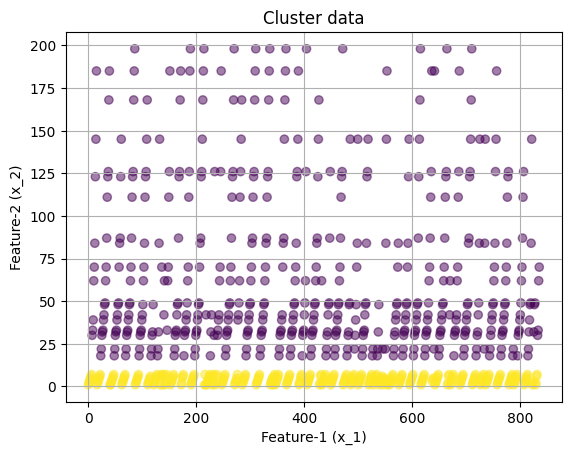

In [24]:
# AGGLOMERATIVE CLUSTERING
opt_labels=maximize_silhouette(x,algo="ag",nmax=15, i_plot=True)
plot(x,opt_labels)

Final results
Once you have everything “dialed in”, re-do the analysis one last time with the optimal parameter choice to get your “final results”.

Now that I have chosen my optimal parameters, I will re- run my algorithms to visualize my optimized clusters.

C:\Users\Amand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


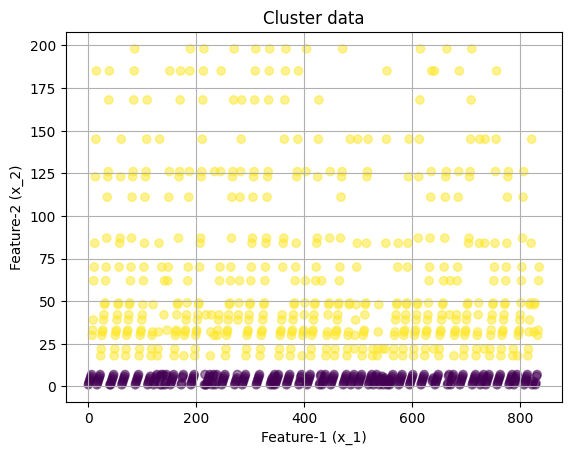

In [28]:
# KMEANS
model = sklearn.cluster.KMeans(n_clusters=2).fit(x)
labels=model.predict(x)
plot(x,labels)

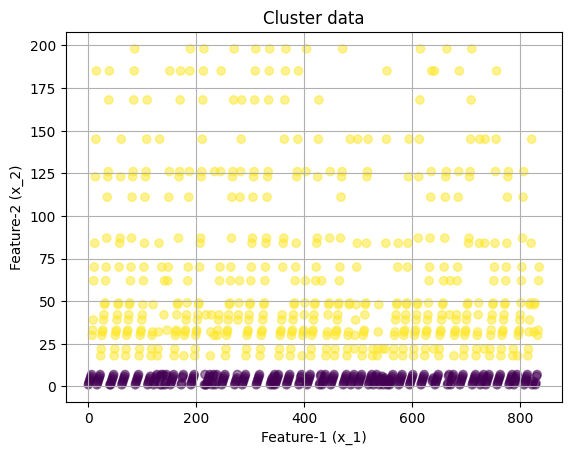

In [32]:
# DBSCAN
model = sklearn.cluster.DBSCAN(eps=0.5, min_samples=2).fit(x)
plot(x,labels)

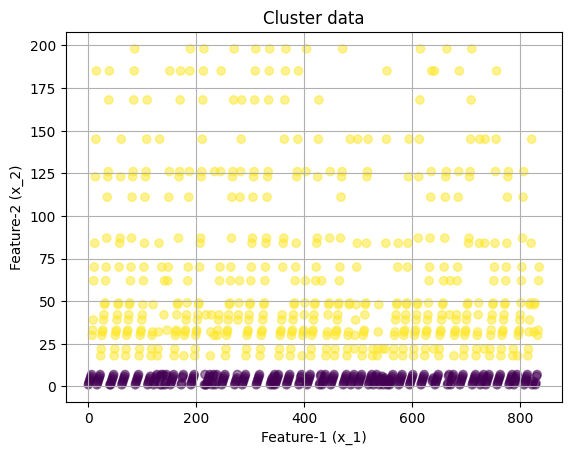

In [33]:
# AGGLOMERATIVE CLUSTERING
model = sklearn.cluster.AgglomerativeClustering(n_clusters=2, linkage="average").fit(x)
plot(x,labels)


Results:
Using your “final results”, discuss, illustrate, and compare the results of your various clustering analysis methods.
Which method seemed to work the best and why, which was easier to use or preferable, etc.
Can you make connections between the optimal cluster predictions, after parameter tuning, with any of the labels in the data set. Do they coincide? Why or why not?
Did the clustering results provide any new insights into your data?
Explore the results, and create as many meaningful visualizations as you need. Be creative, and experiment with different image aesthetics.
Ensure all visualizations are professional, ascetically pleasing, labeled, captioned, use color, are clear, and support your discussion and goals.

I preferred k-means due to the elbow method. the optimal cluster predictions do have connections to the labels in the data set.

Conclusions (non- technical)

Conclusions:
In this section, the goal is to summarize & wrap-up the report. It explains what was found, in a way that would make sense to a general readership.
This area is non-technical. Technical descriptions of what you did should be in the methods or results sections, not conclusions.
The Conclusions should focus on key and important findings and how these findings affect real-life and real people.

References:
- reference lecture notes

References:
Reference all non-original content.
Ideally (but optionally) use .bibtex combined with Quarto to provide in-line internal citations
See the following link for an example:
https://drive.google.com/open?id=12tYQnDuHS4ZxSTXgwsR4pRLhBYAMy14q&authuser=jh2343%40georgetown.edu&usp=d